170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.1237 - loss: 4.9243 - val_accuracy: 0.1708 - val_loss: 2.2039
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1628 - loss: 2.2146 - val_accuracy: 0.1954 - val_loss: 2.1506
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1683 - loss: 2.1947 - val_accuracy: 0.1830 - val_loss: 2.1420
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1712 - loss: 2.1851 - val_accuracy: 0.1860 - val_loss: 2.1788
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1666 - loss: 2.1968 - val_accuracy: 0.1741 - val_loss: 2.1576
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1724 - loss: 2.1853 - val_accuracy: 0.1828 - val_loss: 2.1271
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1715 - loss: 2.1973 - val_accuracy: 0.1820 - val_loss: 2.1274
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1696 - loss: 2.1960 -

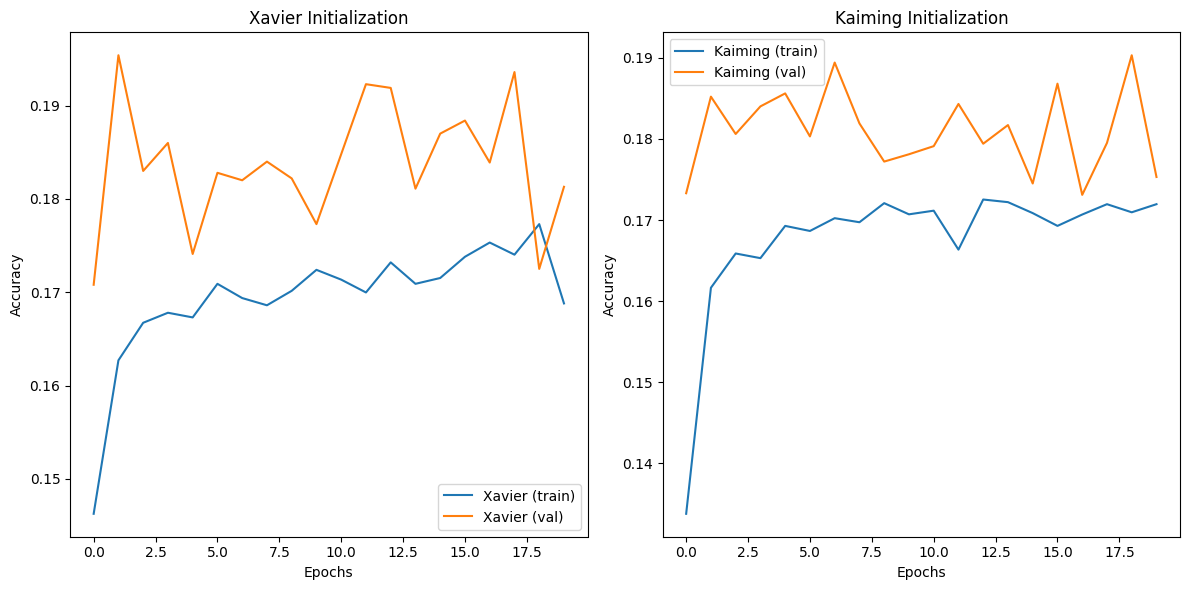

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, initializers, regularizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels, test_labels = to_categorical(train_labels), to_categorical(test_labels)


def create_model(initializer, dropout_rate=0.3, kernel_regularizer=None):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(32, 32, 3)))

    model.add(layers.Dense(512, kernel_initializer=initializer, kernel_regularizer=kernel_regularizer, activation='relu'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(256, kernel_initializer=initializer, kernel_regularizer=kernel_regularizer, activation='relu'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(128, kernel_initializer=initializer, kernel_regularizer=kernel_regularizer, activation='relu'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(64, kernel_initializer=initializer, kernel_regularizer=kernel_regularizer, activation='relu'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(32, kernel_initializer=initializer, kernel_regularizer=kernel_regularizer, activation='relu'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(10, activation='softmax'))  # Output layer for 10 classes

    return model

xavier_initializer = initializers.glorot_normal()
kaiming_initializer = initializers.he_normal()

xavier_model = create_model(xavier_initializer, dropout_rate=0.3, kernel_regularizer=regularizers.l2(0.01))
kaiming_model = create_model(kaiming_initializer, dropout_rate=0.3, kernel_regularizer=regularizers.l2(0.01))


xavier_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
kaiming_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

xavier_history = xavier_model.fit(train_images, train_labels, epochs=20, validation_split=0.2)
kaiming_history = kaiming_model.fit(train_images, train_labels, epochs=20, validation_split=0.2)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(xavier_history.history['accuracy'], label='Xavier (train)')
plt.plot(xavier_history.history['val_accuracy'], label='Xavier (val)')
plt.title('Xavier Initialization')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(kaiming_history.history['accuracy'], label='Kaiming (train)')
plt.plot(kaiming_history.history['val_accuracy'], label='Kaiming (val)')
plt.title('Kaiming Initialization')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


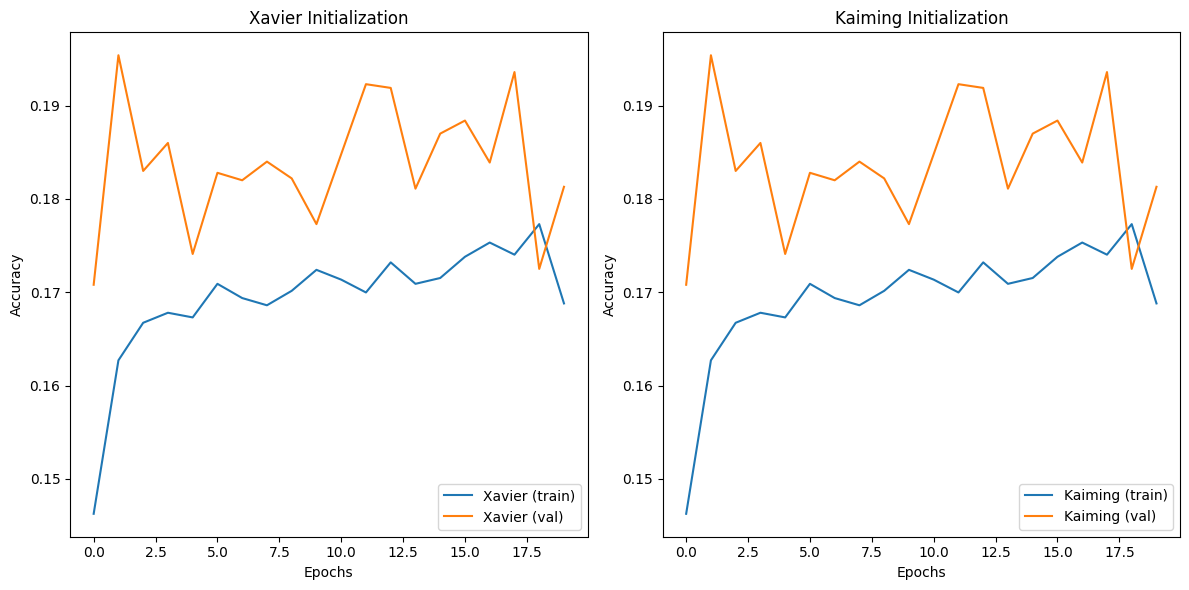

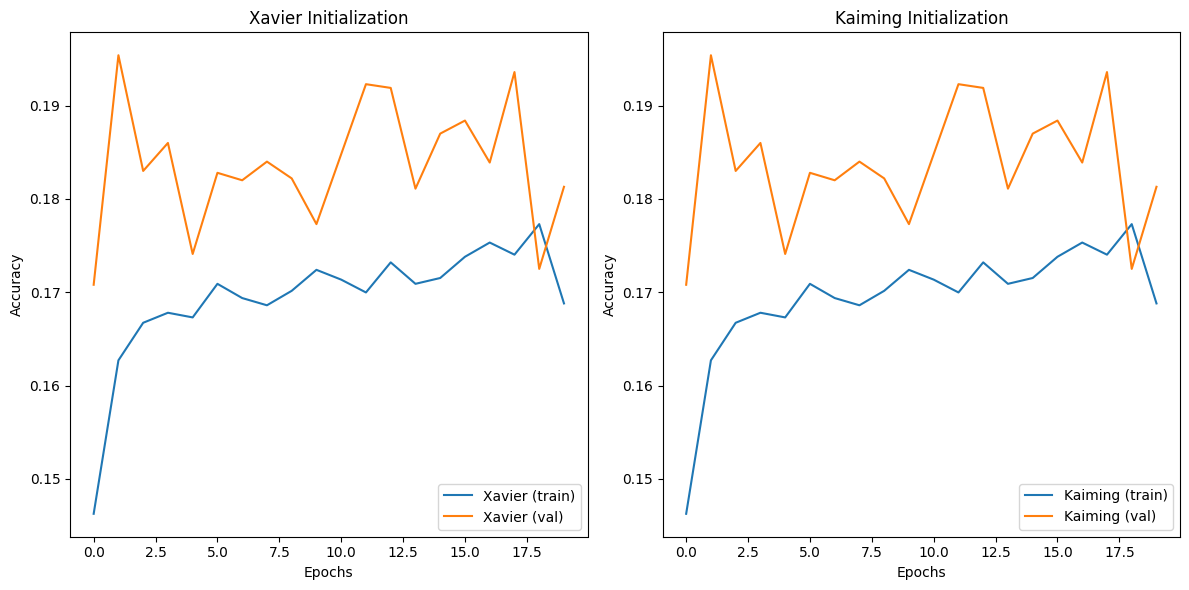

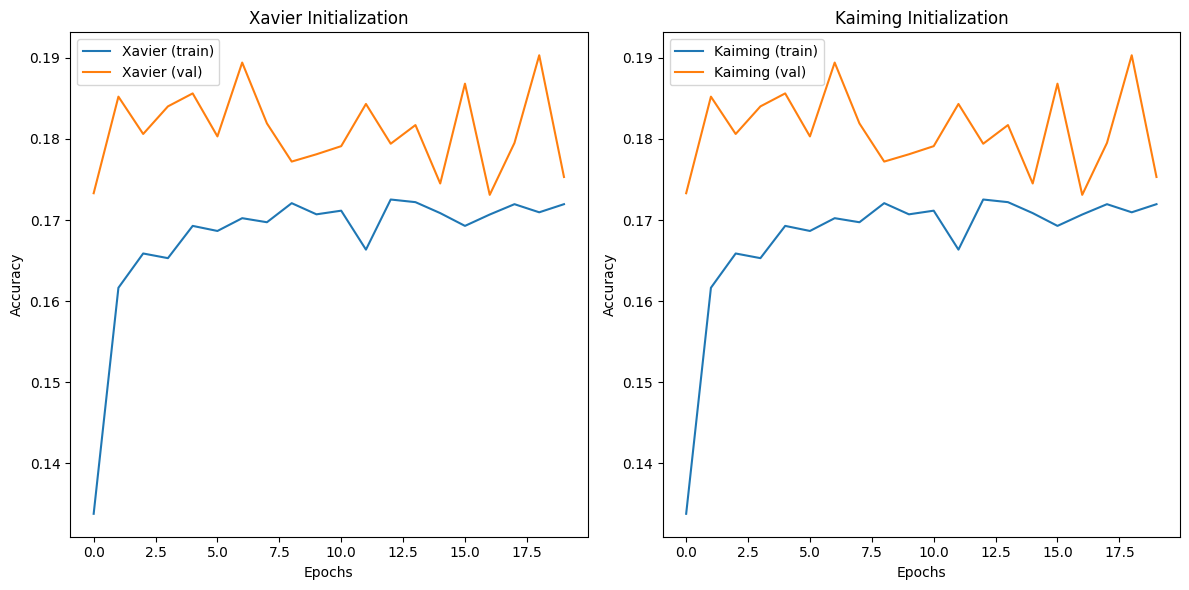

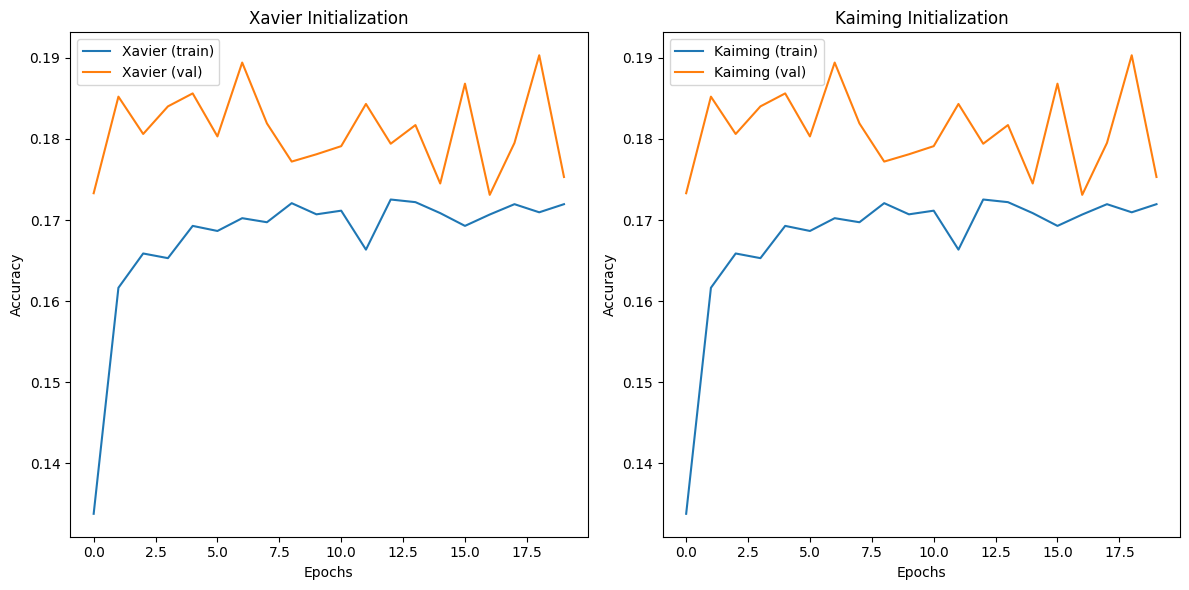

In [ ]:

def plottings(history, metric):
  plt.figure(figsize=(12, 6))

  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'], label='Xavier (train)')
  plt.plot(history.history['val_accuracy'], label='Xavier (val)')
  plt.title('Xavier Initialization')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(history.history['accuracy'], label='Kaiming (train)')
  plt.plot(history.history['val_accuracy'], label='Kaiming (val)')
  plt.title('Kaiming Initialization')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.tight_layout()
  plt.show()

plottings(xavier_history, 'accuracy')
plottings(xavier_history, 'loss')
plottings(kaiming_history, 'accuracy')
plottings(kaiming_history, 'loss')